# Normales precipitación a escala de cuenca hidrográfica nivel 2

Importar modulos de python

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('classic')
import numpy as np
import calendar

sns.set()

from IPython.display import HTML

In [2]:
# Quantile Function Definitions
def q1(x):
    return x.quantile(0.28)

def q2(x):
    return x.median()

def q3(x):
    return x.quantile(0.72)

def q5(x):
    return x.quantile(0.05)

def q95(x):
    return x.quantile(0.95)

def q87(x):
    return x.quantile(0.87)

def q13(x):
    return x.quantile(0.13)

Importar la serie de prcipitación diaria a nivel de cuenca 2 (Dinagua) obtenido de ejecutar Delft-FEWS (FEWS-UY)

In [4]:
PRECIP_DIARIA = pd.read_csv(r'input/daily_rainfall_codcuenca2.csv',sep=",")
PRECIP_DIARIA['FECHA'] = pd.to_datetime(PRECIP_DIARIA['FECHA'])
HTML(PRECIP_DIARIA.head(5).to_html(index=False))

FECHA,63,67,28,52,45,42,40,31,33,32,30,12,13,44,10,15,27,29,24,22,26,20,58,55,54,57,50,43,17,23,65,21,61,64,68,66,62,60,53,51,41,14,11,16,19,18,56
1980-01-01 07:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1980-01-02 07:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1980-01-03 07:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1980-01-04 07:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1980-01-05 07:00:00,7.9,9.6,13.5,14.4,12.3,13.1,12.9,14.4,10.0,4.8,16.8,26.9,28.9,20.5,19.2,18.1,9.3,12.1,6.0,23.1,9.1,14.9,4.6,8.2,11.5,4.5,14.7,15.7,30.8,13.1,7.9,23.2,8.4,12.3,9.0,11.9,7.1,13.3,16.3,14.4,9.7,8.1,21.8,2.7,7.6,1.9,14.7


Seleccionar el periodo de referencia 1991-2020

In [5]:
PRECIP_DIARIA_SELECCION = PRECIP_DIARIA[(PRECIP_DIARIA['FECHA'] > '1991-01-01') & (PRECIP_DIARIA['FECHA'] <= '2021-01-01')]

In [6]:
HTML(PRECIP_DIARIA_SELECCION.tail(5).to_html(index=False))

FECHA,63,67,28,52,45,42,40,31,33,32,30,12,13,44,10,15,27,29,24,22,26,20,58,55,54,57,50,43,17,23,65,21,61,64,68,66,62,60,53,51,41,14,11,16,19,18,56
2020-12-27 07:00:00,0.4,0.0,0.2,0.0,0.5,0.0,0.0,1.1,0.7,0.0,0.4,0.0,0.0,2.7,0.0,0.0,0.0,1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.1,0.8,1.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-12-28 07:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.7,0.0,3.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.8,0.0,1.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.0,0.0
2020-12-29 07:00:00,7.4,0.0,0.0,0.0,0.4,0.0,0.0,0.2,0.6,0.1,0.0,0.0,0.0,0.2,0.8,0.0,2.0,0.0,0.0,0.0,0.3,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,0.1,10.8,2.5,0.0,1.5,10.9,3.5,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,1.8
2020-12-30 07:00:00,1.3,3.0,14.5,30.5,4.9,4.6,3.4,21.5,6.1,6.1,19.4,14.3,16.3,6.7,10.9,22.1,4.3,7.7,2.1,10.3,2.5,4.7,7.0,6.9,8.0,8.2,10.2,7.2,12.6,5.9,6.3,7.0,6.9,2.5,3.0,3.1,3.7,11.8,12.7,24.6,2.4,28.0,6.4,15.2,7.7,5.0,10.7
2020-12-31 07:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
PRECIP_DIARIA_SELECCION.to_clipboard()

Seleccionar la cuenca de interes

In [31]:
codcuenca = 60

PRECIP_CUENCA = PRECIP_DIARIA_SELECCION[['FECHA',str(codcuenca)]]

In [32]:
HTML(PRECIP_CUENCA.head(5).to_html(index=False))

FECHA,60
1991-01-01 07:00:00,19.0
1991-01-02 07:00:00,0.0
1991-01-03 07:00:00,0.0
1991-01-04 07:00:00,0.0
1991-01-05 07:00:00,0.0


In [33]:
PRECIP_CUENCA = PRECIP_CUENCA.set_index('FECHA')

In [34]:
PRECIP_MENSUAL = PRECIP_CUENCA.resample('M').apply(lambda x: x.sum() if x.isnull().sum() < 5 else np.nan)
PRECIP_MENSUAL['Year'] = PRECIP_MENSUAL.index.year
PRECIP_MENSUAL['Month'] = PRECIP_MENSUAL.index.month
PRECIP_MENSUAL = PRECIP_MENSUAL.rename(columns={str(codcuenca): "PRECIP"})
PRECIP_MENSUAL['Month'] = PRECIP_MENSUAL['Month'].apply(lambda x: calendar.month_abbr[x])

In [35]:
HTML(PRECIP_MENSUAL.head(6).to_html())

,PRECIP,Year,Month
FECHA,,,
1991-01-31,116.4,1991,Jan
1991-02-28,73.0,1991,Feb
1991-03-31,35.1,1991,Mar
1991-04-30,121.5,1991,Apr
1991-05-31,113.5,1991,May
1991-06-30,109.4,1991,Jun


In [36]:
PRECIP_MENSUAL.to_clipboard()

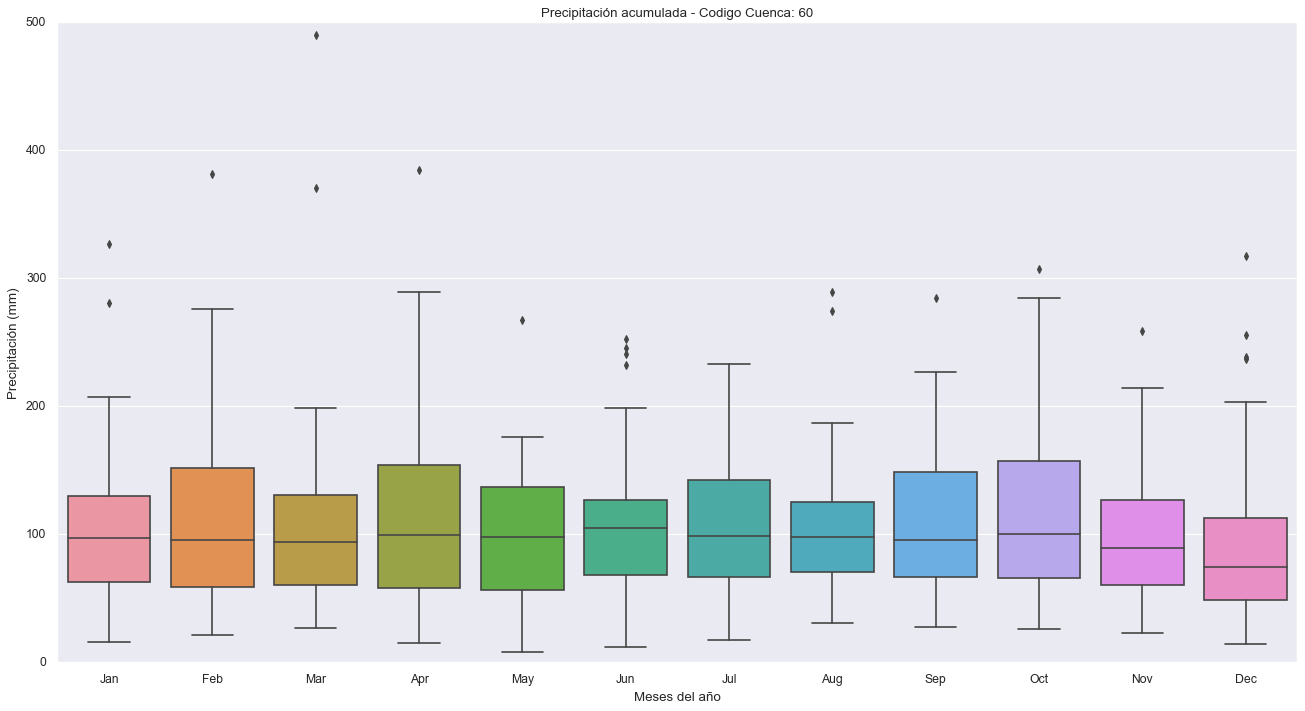

In [37]:
ax1 = plt.figure(figsize=(20, 10))
ax1 = sns.boxplot(data = PRECIP_MENSUAL, x='Month', y='PRECIP');
ax1.set_xlabel('Meses del año');
ax1.set_ylabel('Precipitación (mm)');
ax1.set_title('Precipitación acumulada - Codigo Cuenca: {}'.format(codcuenca));

In [38]:
PRECIP_MENSUAL_STATS = PRECIP_MENSUAL.PRECIP.groupby(PRECIP_MENSUAL.index.month).agg([np.min, q1, q2, np.mean, q3, np.max, np.std, q95, q5, q87, q13])

In [39]:
PRECIP_MENSUAL_STATS = PRECIP_MENSUAL_STATS.reset_index()
PRECIP_MENSUAL_STATS.index = np.arange(1, len(PRECIP_MENSUAL_STATS) + 1)

In [40]:
PRECIP_MENSUAL_STATS['FECHA'] = PRECIP_MENSUAL_STATS['FECHA'].apply(lambda x: calendar.month_abbr[x])

In [41]:
HTML(PRECIP_MENSUAL_STATS.to_html(index=False))

FECHA,amin,q1,q2,mean,q3,amax,std,q95,q5,q87,q13
Jan,16.2,63.672,97.40,108.570000,120.616,326.5,69.989872,247.695,30.910,176.631,51.058
Feb,21.6,63.408,95.80,116.380000,127.592,381.5,79.555235,249.535,36.795,194.157,49.330
Mar,27.0,69.284,93.65,116.293333,117.696,490.3,97.940421,293.310,32.900,169.343,43.798
Apr,14.9,66.204,99.80,114.980000,151.564,384.9,81.771285,250.400,25.245,184.600,40.149
May,7.7,62.140,98.30,99.873333,134.232,267.4,56.483192,173.610,25.605,160.144,43.085
Jun,11.8,69.468,105.25,111.083333,125.304,252.5,67.759270,243.330,20.200,206.682,42.034
Jul,17.8,70.392,98.75,103.406667,140.448,233.3,53.377988,178.025,24.685,150.357,36.239
Aug,30.9,74.348,97.70,105.963333,113.368,289.6,60.466311,234.860,35.725,139.285,46.748
Sep,27.9,69.292,95.50,110.083333,136.564,285.0,61.306776,213.535,35.375,177.559,48.711
Oct,26.1,71.544,99.95,121.323333,151.132,307.1,79.551331,267.780,29.130,220.536,39.588


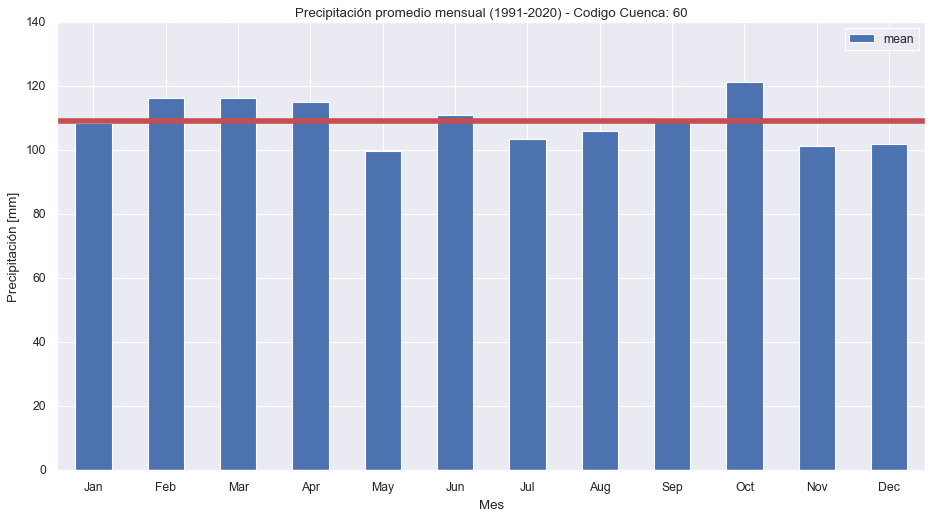

In [42]:
ax2 = PRECIP_MENSUAL_STATS.plot(x="FECHA", y='mean', kind="bar", rot=0,figsize=(14,7))
ax2.axhline(y = np.mean(PRECIP_MENSUAL_STATS['mean']), color = 'r', linestyle = '-',label = "Promedio mensual",linewidth=5)
ax2.set_xlabel('Mes');
ax2.set_ylabel('Precipitación [mm]');
ax2.set_title('Precipitación promedio mensual (1991-2020) - Codigo Cuenca: {}'.format(codcuenca));

## Comparación con el año actual 

In [43]:
PRECIP_ACTUAL = pd.read_csv(r'input/2022_rainfall_codcuenca2.csv',sep=",")
PRECIP_ACTUAL['FECHA'] = pd.to_datetime(PRECIP_ACTUAL['FECHA'])
HTML(PRECIP_ACTUAL.head(5).to_html(index=False))

FECHA,63,67,28,52,45,42,40,31,33,32,30,12,13,44,10,15,27,29,24,22,26,20,58,55,54,57,50,43,17,23,65,21,61,64,68,66,62,60,53,51,41,14,11,16,19,18,56
2022-01-01 07:00:00,6.5,2.0,7.6,9.0,0.2,11.0,14.8,0.5,0.0,0.0,4.0,1.6,11.3,4.6,0.9,12.8,4.8,4.8,10.9,17.6,3.8,13.7,18.4,34.4,23.5,19.6,10.1,4.9,22.1,28.8,22.1,14.2,10.4,8.9,2.0,6.3,11.5,8.9,11.2,3.0,13.9,14.8,15.9,28.1,17.4,12.6,16.7
2022-01-02 07:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.1,0.2,0.0,2.9,0.0,0.0,0.0,0.0,0.1,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0.1,2.1,0.0,0.0,0.0,0.0,5.8,5.8,0.4
2022-01-03 07:00:00,0.0,0.0,0.2,1.3,0.1,0.0,0.0,0.0,0.2,0.0,0.0,3.5,0.9,5.2,6.6,0.7,0.0,0.0,0.0,0.0,0.0,0.0,1.6,6.4,0.5,0.0,4.9,5.1,2.9,0.0,3.6,0.0,16.6,0.0,0.0,0.0,6.2,5.7,1.7,1.3,0.0,0.0,0.6,0.8,0.0,3.1,4.5
2022-01-04 07:00:00,18.4,0.0,15.8,6.5,12.0,4.1,9.5,28.4,14.9,4.9,45.7,0.1,11.7,11.5,1.4,14.1,5.8,65.7,1.4,0.0,9.0,0.0,0.8,5.8,8.2,4.1,1.3,2.0,16.4,1.1,5.5,0.0,5.8,49.1,0.0,14.9,11.7,6.4,0.0,0.7,4.0,6.6,3.8,9.4,0.2,5.4,8.4
2022-01-05 07:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
PRECIP_ACTUAL_CUENCA = PRECIP_ACTUAL[['FECHA',str(codcuenca)]]

In [45]:
PRECIP_ACTUAL_CUENCA = PRECIP_ACTUAL_CUENCA.set_index('FECHA')

In [46]:
PRECIP_ACTUAL_CUENCA = PRECIP_ACTUAL_CUENCA.resample('M').apply(lambda x: x.sum() if x.isnull().sum() < 5 else np.nan)
PRECIP_ACTUAL_CUENCA['Year'] = PRECIP_ACTUAL_CUENCA.index.year
PRECIP_ACTUAL_CUENCA['Month'] = PRECIP_ACTUAL_CUENCA.index.month
PRECIP_ACTUAL_CUENCA = PRECIP_ACTUAL_CUENCA.rename(columns={str(codcuenca): "PRECIP"})
PRECIP_ACTUAL_CUENCA['Month'] = PRECIP_ACTUAL_CUENCA['Month'].apply(lambda x: calendar.month_abbr[x])

In [47]:
HTML(PRECIP_ACTUAL_CUENCA.to_html())

,PRECIP,Year,Month
FECHA,,,
2022-01-31,232.3,2022,Jan
2022-02-28,85.6,2022,Feb
2022-03-31,59.7,2022,Mar
2022-04-30,98.7,2022,Apr
2022-05-31,78.5,2022,May
2022-06-30,4.9,2022,Jun
2022-07-31,138.4,2022,Jul
2022-08-31,38.9,2022,Aug
2022-09-30,19.3,2022,Sep


In [48]:
PRECIP_ACTUAL_CUENCA['CLIM_MEAN'] = PRECIP_MENSUAL_STATS['mean'].values

In [49]:
HTML(PRECIP_ACTUAL_CUENCA.to_html(index=False))

PRECIP,Year,Month,CLIM_MEAN
232.3,2022,Jan,108.570000
85.6,2022,Feb,116.380000
59.7,2022,Mar,116.293333
98.7,2022,Apr,114.980000
78.5,2022,May,99.873333
4.9,2022,Jun,111.083333
138.4,2022,Jul,103.406667
38.9,2022,Aug,105.963333
19.3,2022,Sep,110.083333
60.7,2022,Oct,121.323333


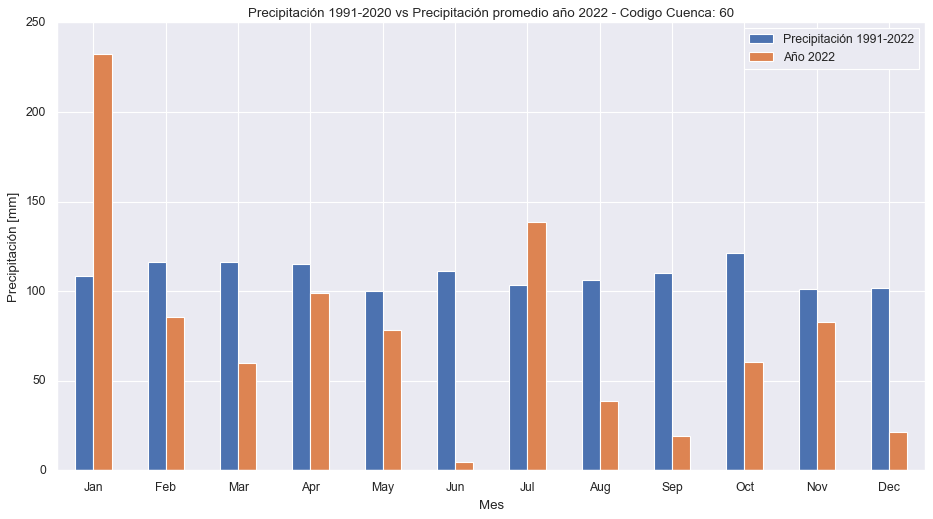

In [50]:
ax3 = PRECIP_ACTUAL_CUENCA.plot(x="Month", y=["CLIM_MEAN","PRECIP"], kind="bar", rot=0,figsize=(14,7))
ax3.set_xlabel('Mes');
ax3.set_ylabel('Precipitación [mm]');
ax3.set_title('Precipitación 1991-2020 vs Precipitación promedio año 2022 - Codigo Cuenca: {}'.format(codcuenca));
ax3.legend(['Precipitación 1991-2022','Año 2022']);

### Precipitación acumulada

In [51]:
PRECIP_ACTUAL_CUENCA['clim_cumsum'] = PRECIP_ACTUAL_CUENCA['CLIM_MEAN'].cumsum(axis=0);
PRECIP_ACTUAL_CUENCA['2022_cumsum'] = PRECIP_ACTUAL_CUENCA['PRECIP'].cumsum(axis=0);

In [52]:
HTML(PRECIP_ACTUAL_CUENCA.head(12).to_html(index=False))

PRECIP,Year,Month,CLIM_MEAN,clim_cumsum,2022_cumsum
232.3,2022,Jan,108.570000,108.570000,232.3
85.6,2022,Feb,116.380000,224.950000,317.9
59.7,2022,Mar,116.293333,341.243333,377.6
98.7,2022,Apr,114.980000,456.223333,476.3
78.5,2022,May,99.873333,556.096667,554.8
4.9,2022,Jun,111.083333,667.180000,559.7
138.4,2022,Jul,103.406667,770.586667,698.1
38.9,2022,Aug,105.963333,876.550000,737.0
19.3,2022,Sep,110.083333,986.633333,756.3
60.7,2022,Oct,121.323333,1107.956667,817.0


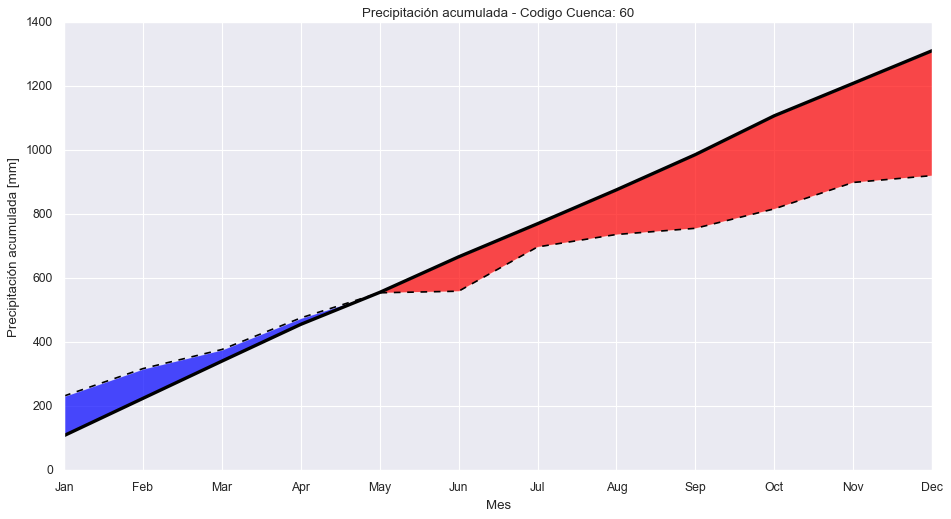

In [54]:
y1 = PRECIP_ACTUAL_CUENCA['clim_cumsum']
y2 = PRECIP_ACTUAL_CUENCA['2022_cumsum']

fig, (ax1) = plt.subplots(1, figsize=(14,7),sharex=True);
ax1.plot(PRECIP_ACTUAL_CUENCA['Month'], y1,color='black',linewidth=3);
ax1.plot(PRECIP_ACTUAL_CUENCA['Month'], y2,color='black',linestyle="--");
ax1.fill_between(PRECIP_ACTUAL_CUENCA['Month'],y1,y2, where=y1 >= y2, facecolor='red', interpolate=True,alpha=0.7)
ax1.fill_between(PRECIP_ACTUAL_CUENCA['Month'],y1,y2, where=y1 <= y2, facecolor='blue', interpolate=True,alpha=0.7)

ax1.set_xlabel('Mes');
ax1.set_ylabel('Precipitación acumulada [mm]');
ax1.set_title('Precipitación acumulada - Codigo Cuenca: {}'.format(codcuenca));